In [1]:
import os
import sys
sys.path.append("..\..")

import pandas as pd
import matplotlib.pyplot as plt

from scada_data_analysis.modules.power_curve_preprocessing import PowerCurveFiltering

In [2]:
df = pd.read_csv('..\datasets\la-haute-borne-data-2017-2020.zip', sep=';')

In [3]:
df.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08T08:00:00+01:00,44.990002,44.990002,44.990002,0.0,14.0,14.0,14.0,0.0,...,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26T02:40:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26T13:50:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R80721,2017-01-26T15:00:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R80721,2017-02-18T01:10:00+01:00,44.990002,44.990002,44.990002,0.0,17.0,17.0,17.0,0.0,...,NaN,NaN,7.99000,NaN,NaN,NaN,7.99000,NaN,NaN,NaN


In [4]:
pc_filter = PowerCurveFiltering(turbine_label='Wind_turbine_name', windspeed_label='Ws_avg',
                                power_label='P_avg', data=df, cutin_speed=3, bin_interval=0.5,
                                z_coeff=2.5, filter_cycle=5, return_fig=True, image_path='..\images')

Wall time: 14.1 s


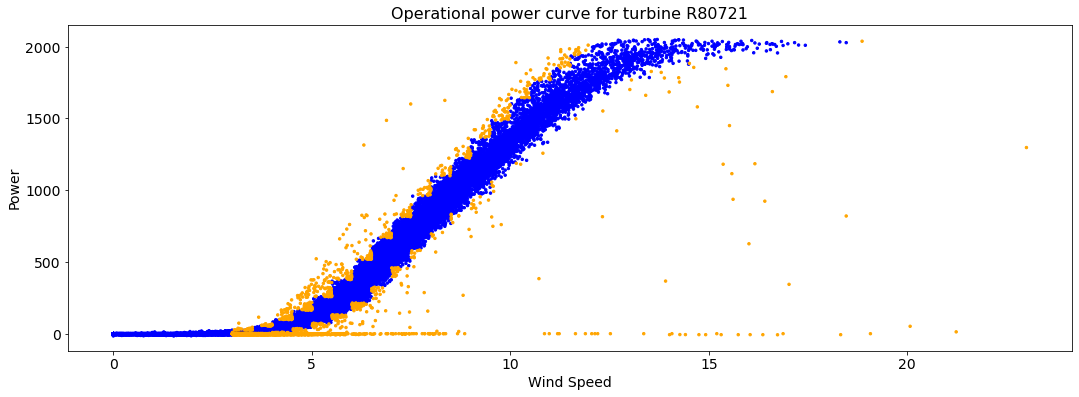

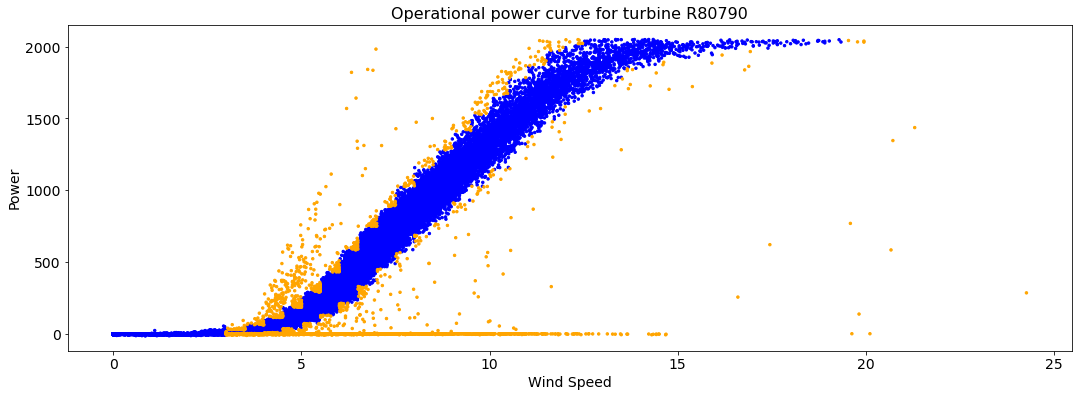

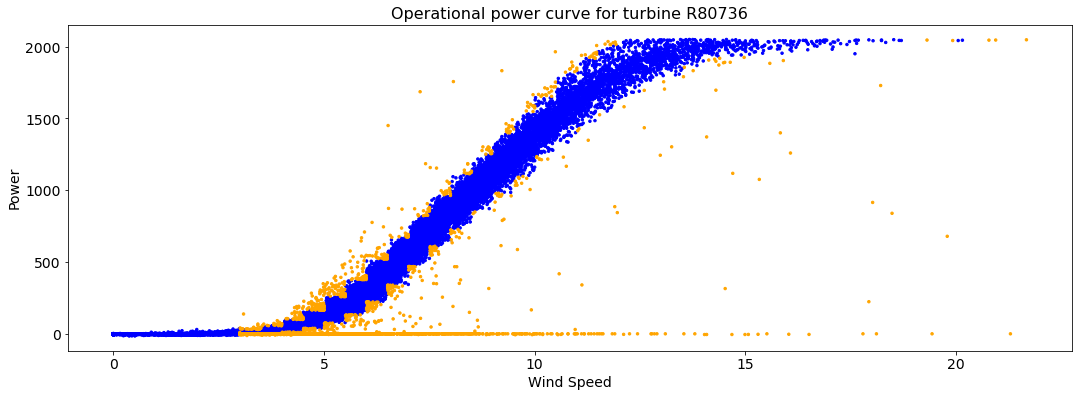

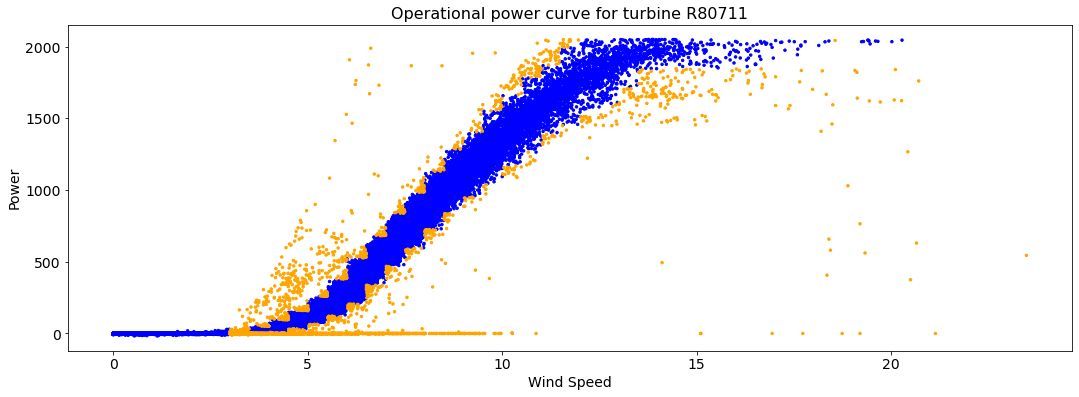

In [5]:
%%time
normal_df, abnormal_df = pc_filter.process()